In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pydataset import data
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from ipywidgets import interactive
from sklearn.datasets import make_regression
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [2]:
x_poly = np.linspace(-2, 4,81)
def cost_function(x):
    return 2*x**2 - 4*x
def gradient(x):
    return (4*x)-4
y_poly = cost_function(x_poly)

def f(iterations, learning_rate, b_start):
    x_path = np.empty(iterations,)
    x_path[0] = b_start
    for i in range(1, iterations):
        derivative = gradient(x_path[i-1])
        x_path[i] = x_path[i-1] - (derivative * learning_rate)
    x_path
    fig = px.line(x = x_poly, y = y_poly, height = 600, width = 900,
                 title = "Iterations or eposh = {0}, Learning Rate = {1}, b_start = {2}".format(iterations, learning_rate, b_start))
    fig.add_trace(go.Scatter(x = x_path, y = cost_function(x_path), mode='lines+markers', 
                             marker=dict(color='#A80000')))
    fig.show()
interactive_plot = interactive(f,b_start=[4, 3.5, 3, 2.5], 
                               iterations= (1,50), learning_rate=(0.001, 0.7, 0.02))
interactive_plot

interactive(children=(IntSlider(value=25, description='iterations', max=50, min=1), FloatSlider(value=0.341, d…

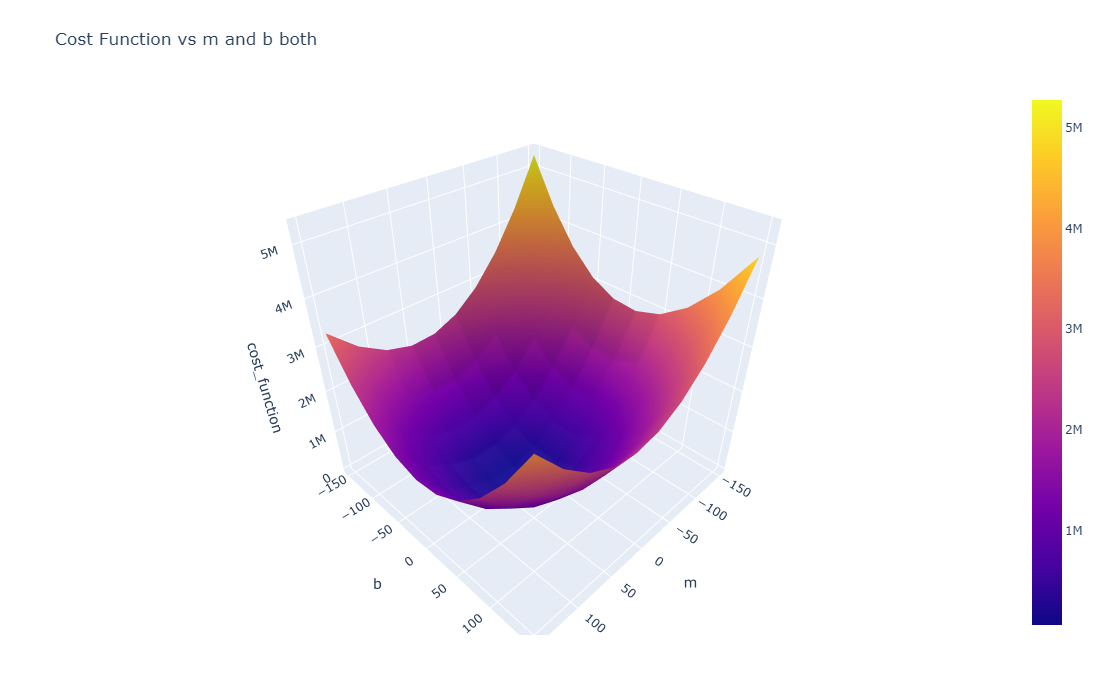

In [3]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)
final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T
z_arr = []
for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))
z_arr = np.array(z_arr).reshape(10,10)
fig = go.Figure(data=[go.Surface(x = m_arr, y = b_arr, z =z_arr)])
fig.update_layout(title='Cost Function vs m and b both', autosize=False,width=800, height=700,
                  margin=dict(l=65, r=50, b=65, t=90), scene = dict(
                    xaxis_title='m',
                    yaxis_title='b',
                    zaxis_title='cost_function'))
fig.show()